### BANKING DATASET PROJECT

##### predicting whether a person will be interested in investing in a term deposit, which will help the bank target its promotion efforts
#####  A term deposit is money that is deposited into a banking institution that cannot be withdrawn for a specific period of time.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from ucimlrepo import fetch_ucirepo

In [4]:
bank = fetch_ucirepo(id=222)

In [5]:
X = pd.DataFrame(bank.data.features)
Y = pd.DataFrame(bank.data.targets)

In [6]:
X.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN


In [7]:
Y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [8]:
print(X.shape,Y.shape)

(45211, 16) (45211, 1)


In [9]:
full_df = pd.concat([X,Y],axis=1)
full_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN,no
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN,no


In [10]:
full_df.shape

(45211, 17)

<Axes: xlabel='y', ylabel='count'>

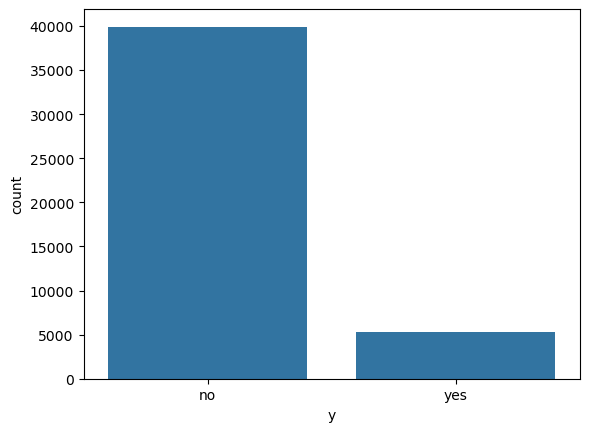

In [11]:
sns.countplot(x=full_df['y'])

In [12]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
full_df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

In [14]:
##missing value percentages for all the data
var_list = full_df.select_dtypes(exclude=np.number).columns
for i, var in enumerate(var_list, start=1):
    print(f'Feature {i}: {var}')
    null = full_df[var].isnull().sum()
    total = len(full_df[var])
    percentage = round((null/total)*100,2)
    print('missing:',null, 'percentage missing:',percentage)

Feature 1: job
missing: 288 percentage missing: 0.64
Feature 2: marital
missing: 0 percentage missing: 0.0
Feature 3: education
missing: 1857 percentage missing: 4.11
Feature 4: default
missing: 0 percentage missing: 0.0
Feature 5: housing
missing: 0 percentage missing: 0.0
Feature 6: loan
missing: 0 percentage missing: 0.0
Feature 7: contact
missing: 13020 percentage missing: 28.8
Feature 8: month
missing: 0 percentage missing: 0.0
Feature 9: poutcome
missing: 36959 percentage missing: 81.75
Feature 10: y
missing: 0 percentage missing: 0.0


#### we can see that 'poutcome' has a huge part of its values as missing values around 82% missing values, followed by the 'contact' with 28.8% of its values missing. Hence, we drop those features as they will cause harm to the model due to them having missing values above 5%  

In [15]:
var_list = full_df.select_dtypes(include=np.number).columns
for i, var in enumerate(var_list, start=1):
    print(f'Feature {i}: {var}')
    null = full_df[var].isnull().sum()
    total = len(full_df[var])
    percentage = round((null/total)*100,2)
    print('missing:',null, 'percentage missing:',percentage)

Feature 1: age
missing: 0 percentage missing: 0.0
Feature 2: balance
missing: 0 percentage missing: 0.0
Feature 3: day_of_week
missing: 0 percentage missing: 0.0
Feature 4: duration
missing: 0 percentage missing: 0.0
Feature 5: campaign
missing: 0 percentage missing: 0.0
Feature 6: pdays
missing: 0 percentage missing: 0.0
Feature 7: previous
missing: 0 percentage missing: 0.0


#### no missing values in the quantitative features

In [16]:
full_df1 = full_df.copy(deep=True)
full_df1.drop(['contact','poutcome'], axis=1, inplace=True)
full_df1

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,NaN,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,NaN,single,NaN,no,1,no,no,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,no


#### we notice that there are NaN values in the dataset for some features.

In [17]:
full_df1.replace(np.nan, '', inplace=True)

In [18]:
full_df1.head(10)

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,,single,,no,1,no,no,5,may,198,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,5,may,380,1,-1,0,no
8,58,retired,married,primary,no,121,yes,no,5,may,50,1,-1,0,no
9,43,technician,single,secondary,no,593,yes,no,5,may,55,1,-1,0,no


In [19]:
full_df1.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Finding out the outliers in the data

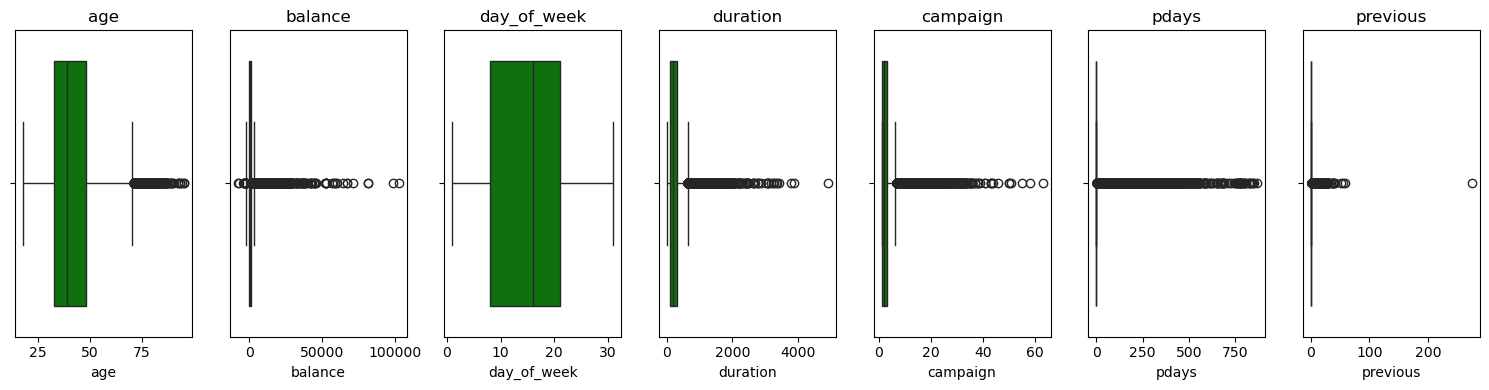

In [20]:
import random
var_list = full_df.select_dtypes(include=np.number).columns
colors = random.choice(['red','cyan','green'])
plt.subplots(1,len(var_list),figsize=(15,4))
for i, var in enumerate(var_list, start=1):
    plt.subplot(1,len(var_list),i)
    sns.boxplot(x=full_df1[var], color=colors)
    plt.title(f'{var}')
plt.tight_layout()
plt.show()

In [21]:
var_list = full_df1.select_dtypes(include=np.number).columns
for i, var in enumerate(var_list, start=1):
    print(f'feature {i}: {var}')
    min_val = full_df1[var].mean() - (3*full_df1[var].std())
    max_val = full_df1[var].mean() + (3*full_df1[var].std())
    full_df1[var] = full_df1[(full_df1[var] >= min_val) & (full_df1[var] < max_val)][var]
    

feature 1: age
feature 2: balance
feature 3: day_of_week
feature 4: duration
feature 5: campaign
feature 6: pdays
feature 7: previous


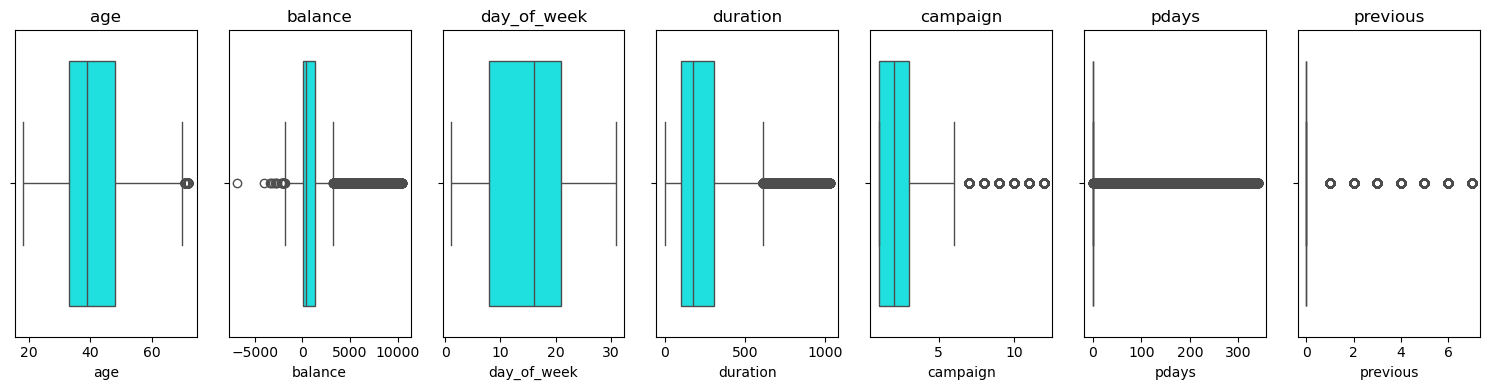

In [22]:
var_list = full_df1.select_dtypes(include=np.number).columns
colors = random.choice(['red','cyan','green'])
plt.subplots(1,len(var_list),figsize=(15,4))
for i, var in enumerate(var_list, start=1):
    plt.subplot(1,len(var_list),i)
    sns.boxplot(x=full_df1[var], color=colors)
    plt.title(f'{var}')
plt.tight_layout()
plt.show()

In [23]:
full_df1.replace('','unknown',inplace=True)

### PreProcessing the dataset

In [24]:
num_vars = full_df1.select_dtypes(include=np.number).columns
for var in num_vars:
    full_df1[var].fillna(full_df1[var].mean(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1376\513620292.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_df1[var].fillna(full_df1[var].mean(), inplace=True)


In [25]:
full_df1

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,5,may,261.000000,1.0,-1.0,0.000000,no
1,44.0,technician,single,secondary,no,29.0,yes,no,5,may,151.000000,1.0,-1.0,0.000000,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,5,may,76.000000,1.0,-1.0,0.000000,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,5,may,92.000000,1.0,-1.0,0.000000,no
4,33.0,unknown,single,unknown,no,1.0,no,no,5,may,198.000000,1.0,-1.0,0.000000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,17,nov,977.000000,3.0,-1.0,0.000000,yes
45207,71.0,retired,divorced,primary,no,1729.0,no,no,17,nov,456.000000,2.0,-1.0,0.000000,yes
45208,72.0,retired,married,secondary,no,5715.0,no,no,17,nov,233.797369,5.0,184.0,3.000000,yes
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,17,nov,508.000000,4.0,-1.0,0.000000,no


In [26]:
##encoding 
def cat_bin(param):
    if param == 'unknown':
        return 0
    elif param == 'primary':
        return 1
    elif param == 'secondary':
        return 2
    else:
        return 3

full_df1['education'] = full_df1['education'].apply(cat_bin)

### visualizations

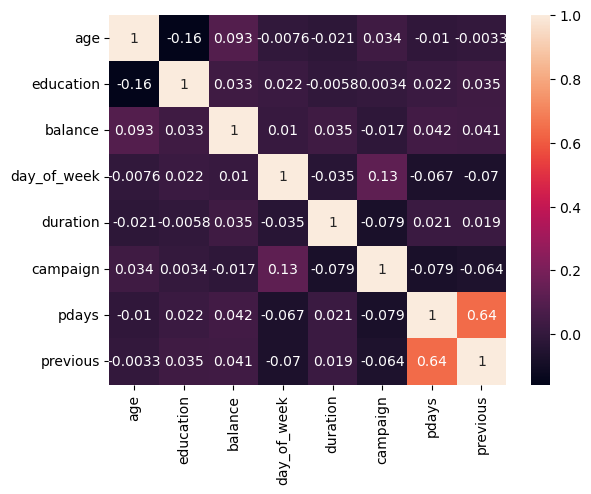

In [27]:
cor = full_df1.corr(numeric_only=True)
sns.heatmap(cor, annot=True)
plt.show()

### Univariate Analysis

In [28]:
full_df1

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,y
0,58.0,management,married,3,no,2143.0,yes,no,5,may,261.000000,1.0,-1.0,0.000000,no
1,44.0,technician,single,2,no,29.0,yes,no,5,may,151.000000,1.0,-1.0,0.000000,no
2,33.0,entrepreneur,married,2,no,2.0,yes,yes,5,may,76.000000,1.0,-1.0,0.000000,no
3,47.0,blue-collar,married,0,no,1506.0,yes,no,5,may,92.000000,1.0,-1.0,0.000000,no
4,33.0,unknown,single,0,no,1.0,no,no,5,may,198.000000,1.0,-1.0,0.000000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,3,no,825.0,no,no,17,nov,977.000000,3.0,-1.0,0.000000,yes
45207,71.0,retired,divorced,1,no,1729.0,no,no,17,nov,456.000000,2.0,-1.0,0.000000,yes
45208,72.0,retired,married,2,no,5715.0,no,no,17,nov,233.797369,5.0,184.0,3.000000,yes
45209,57.0,blue-collar,married,2,no,668.0,no,no,17,nov,508.000000,4.0,-1.0,0.000000,no


### Categorical Features

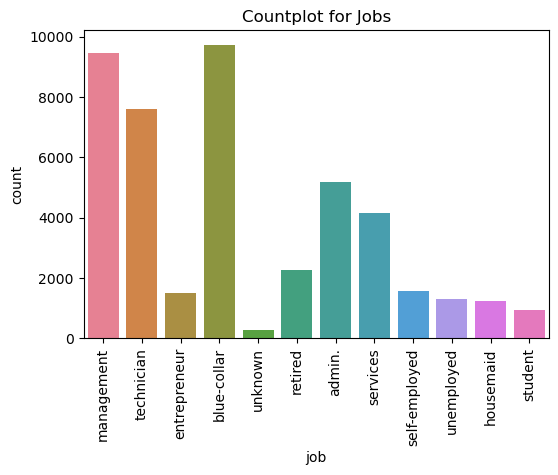

In [29]:
##Job
plt.figure(figsize=(6,4))
sns.countplot(x='job', hue='job', data=full_df1)
plt.tick_params(axis='x', rotation=90)
plt.title('Countplot for Jobs')
plt.show()

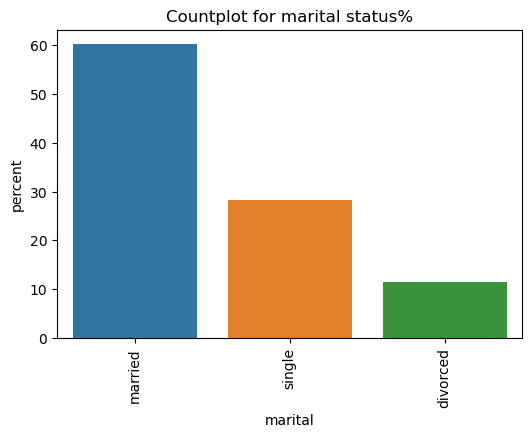

In [30]:
###marital status
plt.figure(figsize=(6,4))
sns.countplot(x='marital', hue='marital', label='marital', data=full_df1,stat='percent')
plt.tick_params(axis='x', rotation=90)
plt.title('Countplot for marital status%')
plt.show()

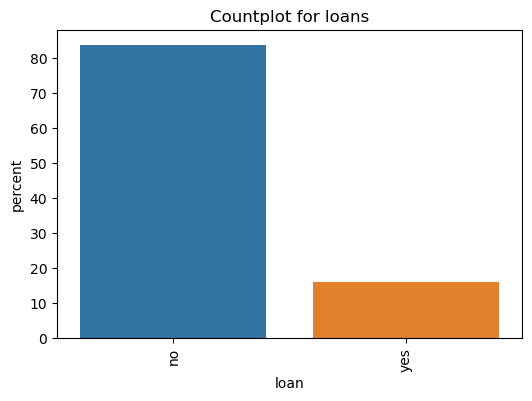

In [31]:
###loans
plt.figure(figsize=(6,4))
sns.countplot(x='loan', hue='loan', data=full_df1,stat='percent')
plt.tick_params(axis='x', rotation=90)
plt.title('Countplot for loans')
plt.show()

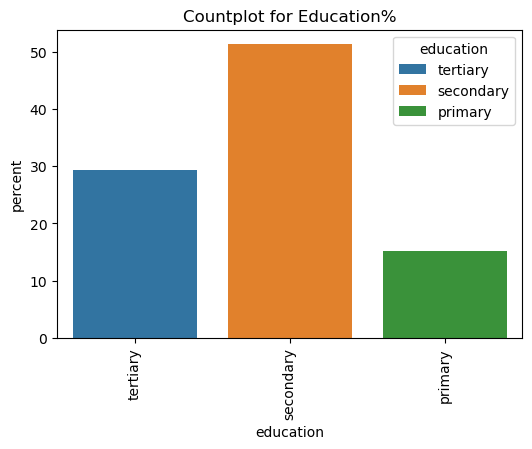

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='education', hue='education', data=full_df, stat='percent')
plt.tick_params(axis='x', rotation=90)
plt.title('Countplot for Education%')
plt.show()

In [33]:
full_df1['age'].describe()

count    45211.000000
mean        40.618693
std         10.036586
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         72.000000
Name: age, dtype: float64

In [34]:
##age
def age_bin(age):
    if age > 18 and age<=30:
        return '18-30'
    elif age >30 and age<=45:
        return '30-45'
    elif age > 45 and age <= 65:
        return '45-65'
    elif age > 65:
        return '65+'
full_df1['age_bin'] = full_df1['age'].apply(age_bin)

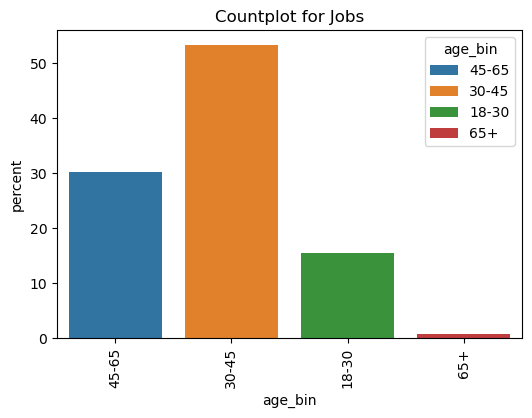

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x='age_bin', hue='age_bin', data=full_df1, stat='percent')
plt.tick_params(axis='x', rotation=90)
plt.title('Countplot for Jobs')
plt.show()

In [36]:
full_df1['balance'].describe()

count    45211.000000
mean      1084.544483
std       1706.829912
min      -6847.000000
25%         72.000000
50%        448.000000
75%       1322.000000
max      10483.000000
Name: balance, dtype: float64

In [37]:
##balance
def bal_bin(bal):
    if bal < 0:
        return '< 0'
    elif bal >0 and bal <=300:
        return '0-300'
    elif bal > 300 and bal <= 1000:
        return '300-1000'
    elif bal > 1000 and bal<=2000:
        return '1000-2000'
    elif bal > 2000:
        return '2k+'
full_df1['bal_bin'] = full_df1['balance'].apply(bal_bin)

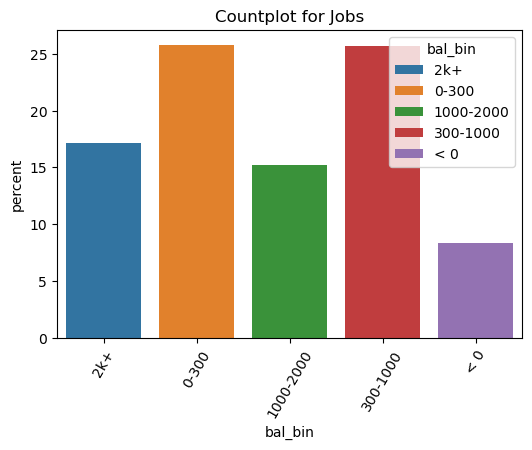

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(x='bal_bin', hue='bal_bin', data=full_df1, stat='percent')
plt.tick_params(axis='x', rotation=60)
plt.title('Countplot for Jobs')
plt.show()

In [39]:
full_df1['bal_bin'].value_counts()

bal_bin
0-300        11670
300-1000     11630
2k+           7757
1000-2000     6875
< 0           3765
Name: count, dtype: int64

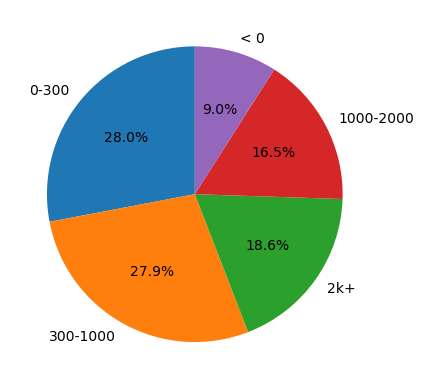

In [40]:
plt.pie(
    full_df1['bal_bin'].value_counts(), 
    labels=full_df1['bal_bin'].value_counts().index, 
    autopct='%.1f%%', 
    startangle=90
)
plt.show()

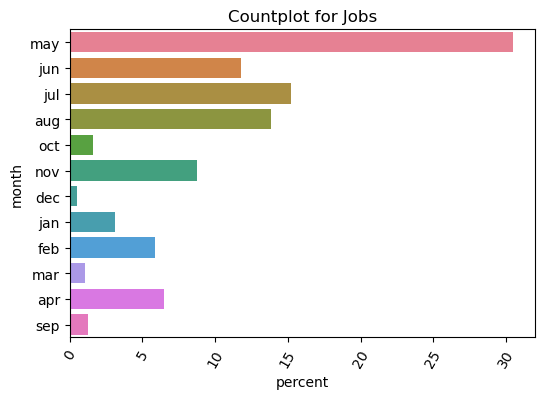

In [41]:
###month
plt.figure(figsize=(6,4))
sns.countplot(y='month', hue='month', data=full_df1, stat='percent')
plt.tick_params(axis='x', rotation=60)
plt.title('Countplot for Jobs')
plt.show()

### Numerical features

In [42]:
num_features = full_df1.select_dtypes(include=np.number).columns
num_features

Index(['age', 'education', 'balance', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous'],
      dtype='object')

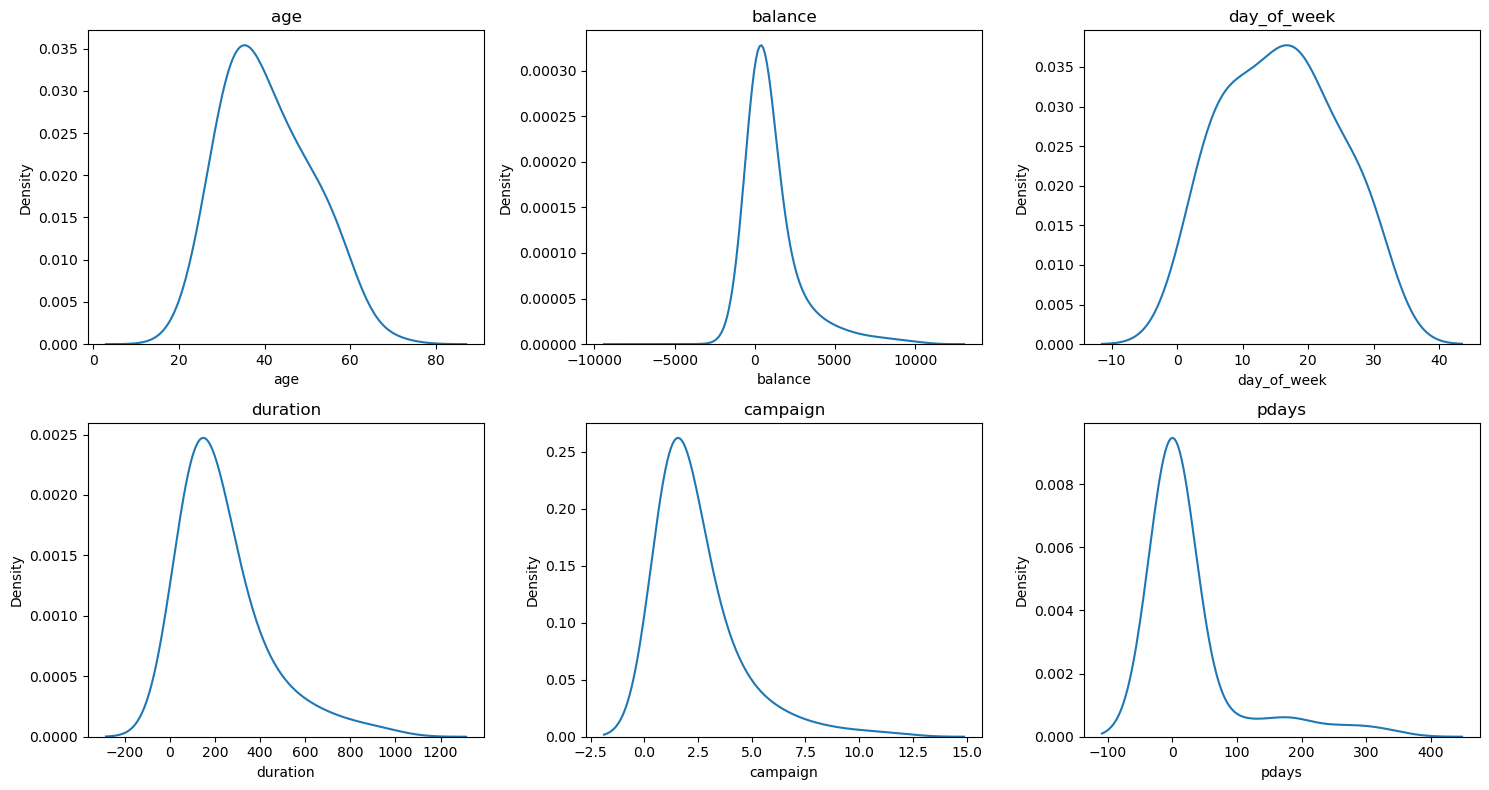

In [43]:
##age,balance,day_of_week,duration,campaign,pdays,previous
fig, axes = plt.subplots(2,3,figsize=(15,8))
sns.kdeplot(full_df1['age'],bw_method=0.5,ax=axes[0][0])
axes[0][0].set_title('age')
sns.kdeplot(full_df1['balance'],bw_method=0.5,ax=axes[0][1])
axes[0][1].set_title('balance')
sns.kdeplot(full_df1['day_of_week'],bw_method=0.5,ax=axes[0][2])
axes[0][2].set_title('day_of_week')
sns.kdeplot(full_df1['duration'],bw_method=0.5,ax=axes[1][0])
axes[1][0].set_title('duration')
sns.kdeplot(full_df1['campaign'],bw_method=0.5,ax=axes[1][1])
axes[1][1].set_title('campaign')
sns.kdeplot(full_df1['pdays'],bw_method=0.5,ax=axes[1][2])
axes[1][2].set_title('pdays')
plt.tight_layout()

### Bivariate Analyis

In [44]:
full_df1.head(4)

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,y,age_bin,bal_bin
0,58.0,management,married,3,no,2143.0,yes,no,5,may,261.0,1.0,-1.0,0.0,no,45-65,2k+
1,44.0,technician,single,2,no,29.0,yes,no,5,may,151.0,1.0,-1.0,0.0,no,30-45,0-300
2,33.0,entrepreneur,married,2,no,2.0,yes,yes,5,may,76.0,1.0,-1.0,0.0,no,30-45,0-300
3,47.0,blue-collar,married,0,no,1506.0,yes,no,5,may,92.0,1.0,-1.0,0.0,no,45-65,1000-2000


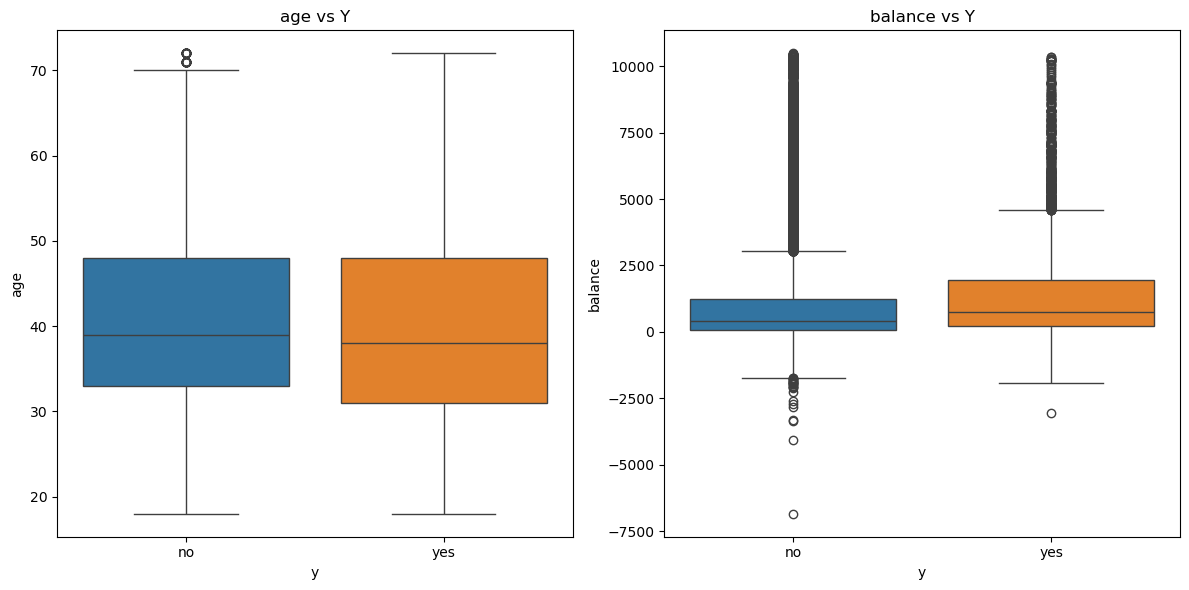

In [45]:
### age vs y
fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.boxplot(x='y', y='age', data=full_df1, ax=axes[0], hue='y')
axes[0].set_title('age vs Y')
sns.boxplot(x='y', y='balance', data=full_df1, ax=axes[1], hue='y')
axes[1].set_title('balance vs Y')
plt.tight_layout()

In [46]:
### marital status vs y
### for 'yes' in y
ms_y = full_df1[full_df1['y']=='yes'].groupby(['marital']).size()
ms_n = full_df1[full_df1['y']=='no'].groupby(['marital']).size()
ms_y = pd.DataFrame(ms_y)
ms_n = pd.DataFrame(ms_n)
ms_y.reset_index(inplace=True)
ms_n.reset_index(inplace=True)

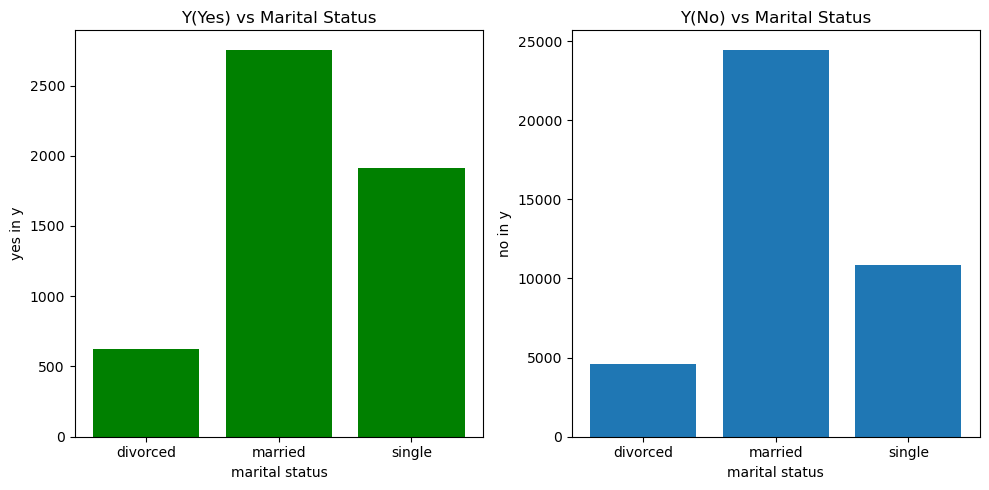

In [47]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].bar(x=ms_y['marital'],height=ms_y[0],color='green')
axes[0].set_title('Y(Yes) vs Marital Status')
axes[0].set_xlabel('marital status')
axes[0].set_ylabel('yes in y')
axes[1].bar(x=ms_n['marital'],height=ms_n[0],)
axes[1].set_title('Y(No) vs Marital Status')
axes[1].set_xlabel('marital status')
axes[1].set_ylabel('no in y')
plt.tight_layout()
plt.show()

In [48]:
###job vs y
jobs_y = full_df1[full_df1['y']=='yes'].groupby(['job']).size()
jobs_n = full_df1[full_df1['y']=='no'].groupby(['job']).size()
jobs_y = pd.DataFrame(jobs_y)
jobs_n = pd.DataFrame(jobs_n)
jobs_y.reset_index(inplace=True)
jobs_n.reset_index(inplace=True)

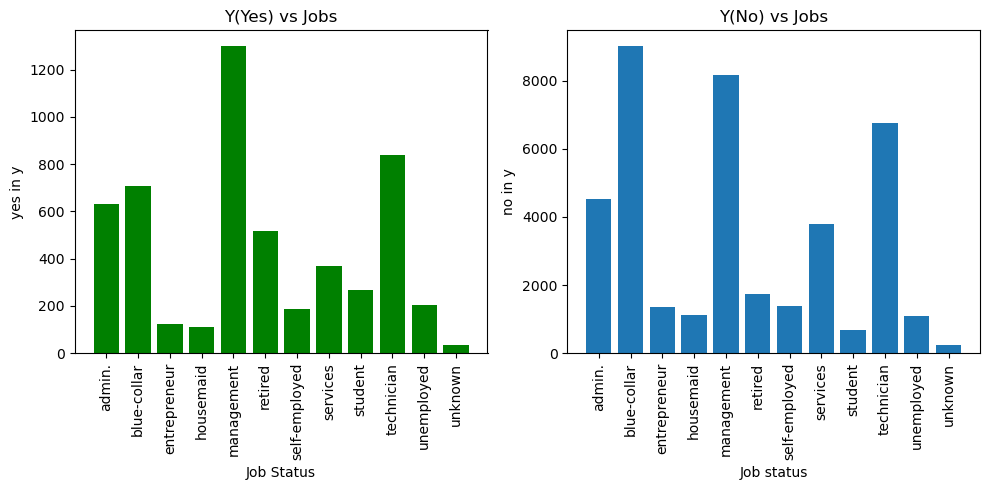

In [49]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].bar(x=jobs_y['job'],height=jobs_y[0],color='green')
axes[0].set_title('Y(Yes) vs Jobs')
axes[0].set_xlabel('Job Status')
axes[0].set_ylabel('yes in y')
axes[0].tick_params(axis='x', rotation=90)
axes[1].bar(x=jobs_n['job'],height=jobs_n[0],)
axes[1].set_title('Y(No) vs Jobs')
axes[1].set_xlabel('Job status')
axes[1].set_ylabel('no in y')
axes[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

### Preproicessing part 2

In [50]:
dummies = pd.get_dummies(full_df1['marital'], drop_first=True, dtype=float)
full_df1 = pd.concat([full_df1.drop('marital',axis=1), dummies], axis=1)

In [51]:
full_df1.head()

,age,job,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,y,age_bin,bal_bin,married,single
0,58.0,management,3,no,2143.0,yes,no,5,may,261.0,1.0,-1.0,0.0,no,45-65,2k+,1.0,0.0
1,44.0,technician,2,no,29.0,yes,no,5,may,151.0,1.0,-1.0,0.0,no,30-45,0-300,0.0,1.0
2,33.0,entrepreneur,2,no,2.0,yes,yes,5,may,76.0,1.0,-1.0,0.0,no,30-45,0-300,1.0,0.0
3,47.0,blue-collar,0,no,1506.0,yes,no,5,may,92.0,1.0,-1.0,0.0,no,45-65,1000-2000,1.0,0.0
4,33.0,unknown,0,no,1.0,no,no,5,may,198.0,1.0,-1.0,0.0,no,30-45,0-300,0.0,1.0


In [52]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
features_to_convert = ['job','default','housing','loan','month','y']
for i in features_to_convert:
    full_df1[i] = enc.fit_transform(full_df1[i].astype('str'))

In [53]:
data = full_df1.copy(deep=True)
data.head()

,age,job,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,y,age_bin,bal_bin,married,single
0,58.0,4,3,0,2143.0,1,0,5,8,261.0,1.0,-1.0,0.0,0,45-65,2k+,1.0,0.0
1,44.0,9,2,0,29.0,1,0,5,8,151.0,1.0,-1.0,0.0,0,30-45,0-300,0.0,1.0
2,33.0,2,2,0,2.0,1,1,5,8,76.0,1.0,-1.0,0.0,0,30-45,0-300,1.0,0.0
3,47.0,1,0,0,1506.0,1,0,5,8,92.0,1.0,-1.0,0.0,0,45-65,1000-2000,1.0,0.0
4,33.0,11,0,0,1.0,0,0,5,8,198.0,1.0,-1.0,0.0,0,30-45,0-300,0.0,1.0


In [54]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler1 = StandardScaler()

In [55]:
data.drop(['age_bin','bal_bin'], axis=1, inplace=True)

In [56]:
X = data.drop('y',axis=1,)
Y = data['y']

In [57]:
X.head()

,age,job,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,married,single
0,58.0,4,3,0,2143.0,1,0,5,8,261.0,1.0,-1.0,0.0,1.0,0.0
1,44.0,9,2,0,29.0,1,0,5,8,151.0,1.0,-1.0,0.0,0.0,1.0
2,33.0,2,2,0,2.0,1,1,5,8,76.0,1.0,-1.0,0.0,1.0,0.0
3,47.0,1,0,0,1506.0,1,0,5,8,92.0,1.0,-1.0,0.0,1.0,0.0
4,33.0,11,0,0,1.0,0,0,5,8,198.0,1.0,-1.0,0.0,0.0,1.0


In [58]:
Y = pd.DataFrame(Y)

In [59]:
x_scaled_mms = pd.DataFrame(scaler.fit_transform(X))
x_scaled_ss = pd.DataFrame(scaler1.fit_transform(X))

In [60]:
x_scaled_mms = x_scaled_mms.replace(np.nan, )
x_scaled_ss = x_scaled_ss.replace(np.nan, '')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1376\71750117.py:1: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  x_scaled_mms = x_scaled_mms.replace(np.nan, )


### Building the model

#### Splitting the dataset

In [61]:
from sklearn.model_selection import train_test_split, KFold

In [62]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled_mms,Y, test_size=0.1, random_state=101)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(40689, 15) (40689, 1) (4522, 15) (4522, 1)


In [63]:
val_set = X_test.shape[0]/X_train.shape[0]
print(val_set)

0.11113568777802355


In [64]:
X_train_new,X_dev,y_train_new,y_dev = train_test_split(X_train,y_train,test_size=val_set, random_state=101)
print(X_train_new.shape,y_train_new.shape,X_dev.shape,y_dev.shape,X_test.shape,y_test.shape)

(36167, 15) (36167, 1) (4522, 15) (4522, 1) (4522, 15) (4522, 1)


### FIRST ATTEMPT

### Decision Tree Classifier

In [65]:
from sklearn.tree import plot_tree, DecisionTreeClassifier
np.random.seed(0)
tree = DecisionTreeClassifier(random_state=101)

In [66]:
model_tree = tree.fit(X_train_new,y_train_new)
model_tree

DecisionTreeClassifier(random_state=101)

### NEURAL NETWORK

In [67]:
from sklearn.neural_network import MLPClassifier

In [68]:
from sklearn.metrics import precision_score

In [69]:
model_NN = MLPClassifier(random_state=101)
model_NN.fit(X_train_new,y_train_new)

C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=101)

In [70]:
##for the decision tree classifier
X_sets = [X_train_new,X_dev,X_test]
y_sets = [y_train_new,y_dev,y_test]

precision =[]

for i in range(0,len(X_sets)):
    pred = model_tree.predict(X_sets[i])
    score = precision_score(y_sets[i],pred)
    precision.append(score)
print(precision)

[1.0, 0.39482758620689656, 0.41651705565529623]


In [71]:
#neural network
X_sets = [X_train_new,X_dev,X_test]
y_sets = [y_train_new,y_dev,y_test]

precision =[]

for i in range(0,len(X_sets)):
    pred = model_NN.predict(X_sets[i])
    score = precision_score(y_sets[i],pred)
    precision.append(score)
print(precision)

[0.6257693885925318, 0.5205882352941177, 0.574750830564784]


### SECOND ATTEMPT

In [72]:
model_tree = DecisionTreeClassifier(random_state=2, min_samples_leaf=100,max_depth=100)
model_tree.fit(X_train_new,y_train_new)

DecisionTreeClassifier(max_depth=100, min_samples_leaf=100, random_state=2)

In [73]:
model_NN = MLPClassifier(random_state=2, hidden_layer_sizes=[100,100,50,25,25], tol=1e-4,max_iter=1000,alpha=0.0004,
                        learning_rate='invscaling')
model_NN.fit(X_train_new,y_train_new)

C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=0.0004, hidden_layer_sizes=[100, 100, 50, 25, 25],
              learning_rate='invscaling', max_iter=1000, random_state=2)

In [74]:
##for the decision tree classifier
X_sets = [X_train_new,X_dev,X_test]
y_sets = [y_train_new,y_dev,y_test]

precision1 =[]

for i in range(0,len(X_sets)):
    pred = model_tree.predict(X_sets[i])
    score = precision_score(y_sets[i],pred)
    precision1.append(score)
print(precision1)

[0.6180451127819548, 0.552, 0.6130030959752322]


In [75]:
#neural network
X_sets = [X_train_new,X_dev,X_test]
y_sets = [y_train_new,y_dev,y_test]

precision =[]

for i in range(0,len(X_sets)):
    pred = model_NN.predict(X_sets[i])
    score = precision_score(y_sets[i],pred)
    precision.append(score)
print(precision)

[0.8150908244061481, 0.3802083333333333, 0.41776937618147447]


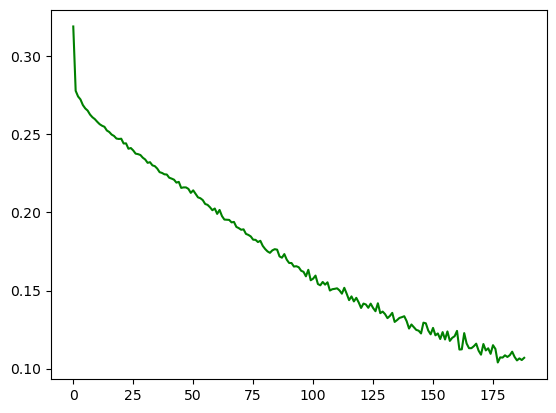

In [76]:
plt.plot(range(0,len(model_NN.loss_curve_)),model_NN.loss_curve_,'g-')
plt.show()

### applying GridSearchCV to find best parameters

In [77]:
from sklearn.model_selection import GridSearchCV

### decision tree gridsearch

In [78]:
n_fold =5
params = {'min_samples_leaf':range(150,800,20),
          'criterion':['gini','entropy'],
          'max_depth':range(150,800,20),
         }
model = DecisionTreeClassifier(random_state=2)
grid = GridSearchCV(estimator=model,param_grid=params, cv=n_fold, scoring='accuracy')
grid.fit(X_train_new,y_train_new)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(150, 800, 20),
                         'min_samples_leaf': range(150, 800, 20)},
             scoring='accuracy')

In [79]:
scores = pd.DataFrame(grid.cv_results_)
scores.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.115914,0.008459,0.005512,0.000642,gini,150,150,"{'criterion': 'gini', 'max_depth': 150, 'min_s...",0.889411,0.894941,0.893129,0.893405,0.894373,0.893052,0.001934,1
1,0.105811,0.005189,0.004759,0.000310,gini,150,170,"{'criterion': 'gini', 'max_depth': 150, 'min_s...",0.888305,0.892314,0.892299,0.890640,0.892161,0.891144,0.001552,67
2,0.102098,0.004724,0.004943,0.000501,gini,150,190,"{'criterion': 'gini', 'max_depth': 150, 'min_s...",0.888029,0.892452,0.890778,0.890640,0.891470,0.890674,0.001470,166


In [80]:
pd.DataFrame(list(zip(scores['param_max_depth'],scores['rank_test_score'])), columns=['param_max_depth','rank_test_score'])

,param_max_depth,rank_test_score
0,150,1
1,150,67
2,150,166
3,150,199
4,150,496
...,...,...
2173,790,1915
2174,790,1948
2175,790,1981
2176,790,2047


In [81]:
pd.DataFrame(list(zip(scores['param_min_samples_leaf'],scores['rank_test_score'])), columns=['param_max_depth','rank_test_score']).sort_values(by='rank_test_score', ascending=True)

,param_max_depth,rank_test_score
0,150,1
396,150,1
429,150,1
66,150,1
1023,150,1
...,...,...
230,790,2146
857,790,2146
428,790,2146
791,790,2146


In [82]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 150, 'min_samples_leaf': 150}

In [83]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=150, min_samples_leaf=150, random_state=2)

In [84]:
##refitting the model
model_tree = DecisionTreeClassifier(random_state=2, criterion='gini',max_depth=150,min_samples_leaf=150)
model_tree.fit(X_train_new,y_train_new)

DecisionTreeClassifier(max_depth=150, min_samples_leaf=150, random_state=2)

In [85]:
X_sets = [X_train_new,X_dev,X_test]
y_sets = [y_train_new,y_dev,y_test]

precision1 =[]

for i in range(0,len(X_sets)):
    pred = model_tree.predict(X_sets[i])
    score = precision_score(y_sets[i],pred)
    precision1.append(score)
print(precision1)

[0.6265260821309656, 0.5607843137254902, 0.6076555023923444]


In [86]:
results = pd.DataFrame(['Training Set','Validation set','Testing Set'])
ds = pd.DataFrame(list(zip(precision1,precision)), columns=['Decision Tree','Multilayer Perceptron'])
results = pd.concat([results,ds],axis=1)
results.rename({0:'data sets'},axis=1, inplace=True)

In [87]:
results

,data sets,Decision Tree,Multilayer Perceptron
0,Training Set,0.626526,0.815091
1,Validation set,0.560784,0.380208
2,Testing Set,0.607656,0.417769


In [88]:
results[['error_dt','error_mlp']] = results[['Decision Tree','Multilayer Perceptron']].apply(lambda x: 1-x)

In [89]:
results

,data sets,Decision Tree,Multilayer Perceptron,error_dt,error_mlp
0,Training Set,0.626526,0.815091,0.373474,0.184909
1,Validation set,0.560784,0.380208,0.439216,0.619792
2,Testing Set,0.607656,0.417769,0.392344,0.582231


##### we can see that for the neural network, the model has the highest error between the validation set and the training set, hence is the model is likely suffering from high variance, hence the need to introduce some regularization

### SAVINNG THE MODEL

In [90]:
import pickle
import os

In [92]:
path = os.getcwd()+'/model_exercise.pkl'
file = open(path,'wb')
pickle.dump(model_NN,file)

### loading the model

In [93]:
import os
import pickle
from sklearn.neural_network import MLPClassifier

In [95]:
path = os.getcwd()+'/model_exercise.pkl'
file = open(path,'rb')
model = pickle.load(file)

In [101]:
print(model.predict([[42, 2, 0, 0, 1, 2, 1, 0, 5, 8, 380, 1, -1, 0,1]]))

[0]
